In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [29]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=300)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(3))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.25, n_jobs=1)

print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))

sampler.save('tmp/sampler.ge')

fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000713167527348, average=False, class_weight=None,
       epsilon=0.1, eta0=0.538489010253, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=47, n_jobs=1,
       penalty='l1', power_t=0.617758346619, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 300  #interfaces: 122   #cores: 54   #core-interface-pairs: 378
graph grammar stats:
#instances: 300   #interfaces: 122   #cores: 54   #core-interface-pairs: 378
Saved model: tmp/sampler.ge
CPU times: user 32.1 s, sys: 3.34 s, total: 35.4 s
Wall time: 31.5 s


In [30]:
%%time
from graphlearn.graphlearn import GraphLearnSampler
sampler=GraphLearnSampler()
sampler.load('tmp/sampler.ge')

# graph sampling
graphs = get_graphs(dataset_fname, size=100)

id_start=34
id_end=id_start+12
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=50
n_samples=5

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=False,
                        probabilistic_core_choice=False,
                        score_core_choice= True,
                        max_core_size_diff=-1,
                        burnin=1,
                        omit_seed=False,
                        proposal_probability = True,
                        improving_threshold=.8, 
                        improving_linear_start=0.2,
                        accept_static_penalty=0.0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True  )

Loaded model: tmp/sampler.ge
CPU times: user 300 ms, sys: 24 ms, total: 324 ms
Wall time: 327 ms


preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 10
    burnin: 1
estimatorobject: <graphlearn.estimator.Wrapper instance at 0x7fe98df04cf8>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fe98df04c68>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 10
improving_penalty_per_step: 0.0333333333333
improving_threshold: 40
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7fe98f6accd0>
max_core_size_diff: -2
    n_jobs: 1
   n_steps: 50
      nbit: 20
node_entity_check: <function <lambda> at 0x7fe98ce78f50>
 omit_seed: False
postprocessor: <graphlearn.processing.PostProcessor object at 0x7fe98f6ace50>
preprocessor: <graphlearn.processing.PreProcessor object at 0x7fe98f6ac950>
probabilistic_core_choice: False
proposal_probability: True
quick_skip_orig_cip: False
radius_list: [0, 2]
random_state: 42447
sample_path: None
sampling_interval: 13

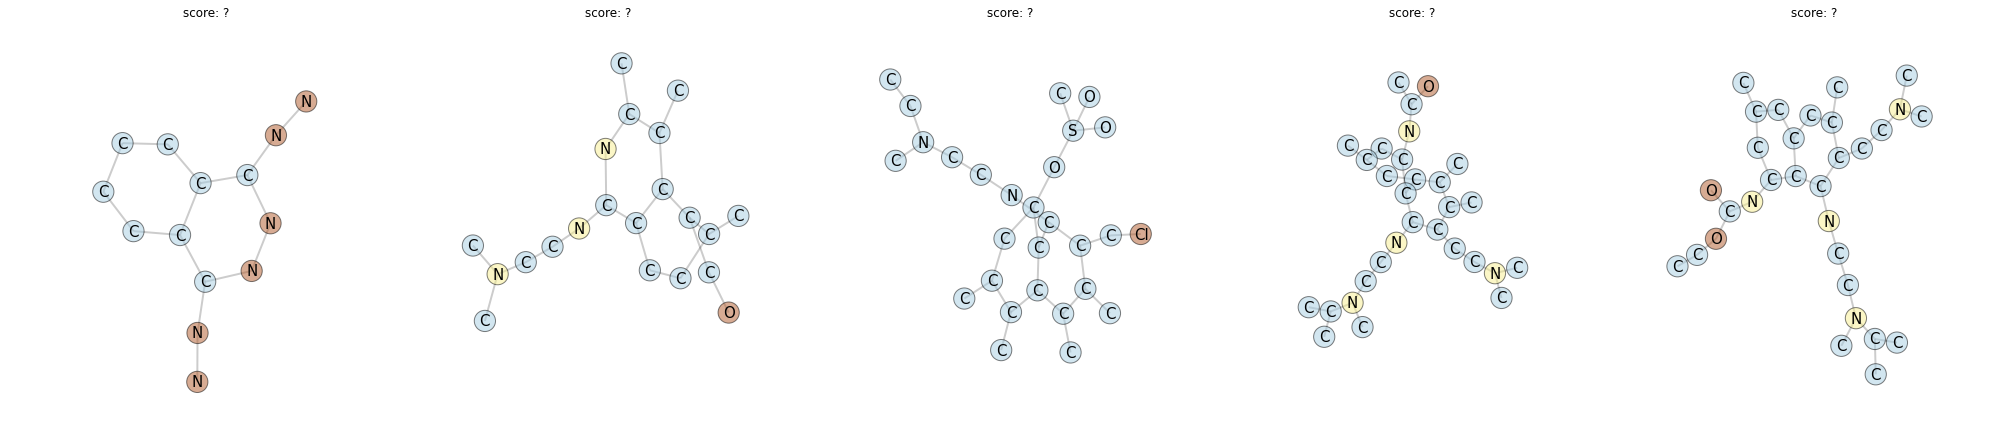

reverse_direction_modifier: 1.084746
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.966555
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.037975
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.087404
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.041834
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.083333
_propose_graph: iteration 5 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.927525
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.029536
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.016913
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.075020
_propose_graph: iteration 

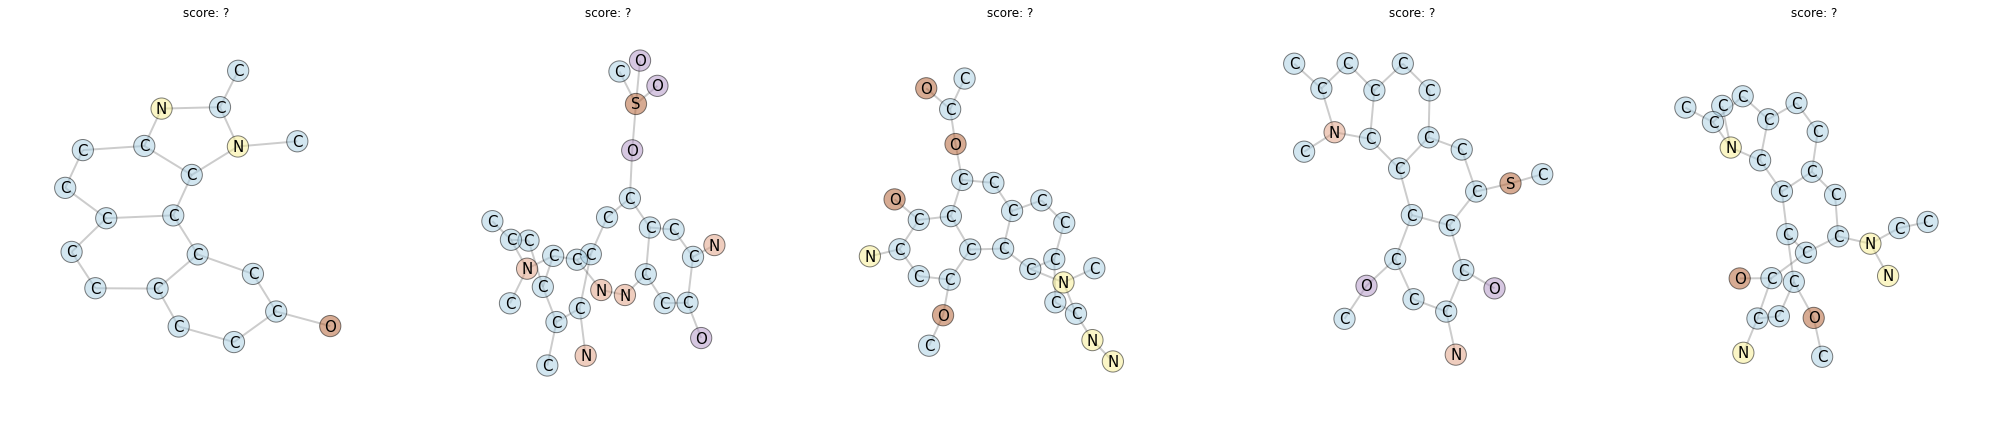

reverse_direction_modifier: 1.000000
_propose_graph: iteration 0 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.018414
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.986486
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.012422
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.925000
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.818737
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.079208
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.083333
_propose_graph: iteration 7 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.941803
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.011723
_propose_graph: iterati

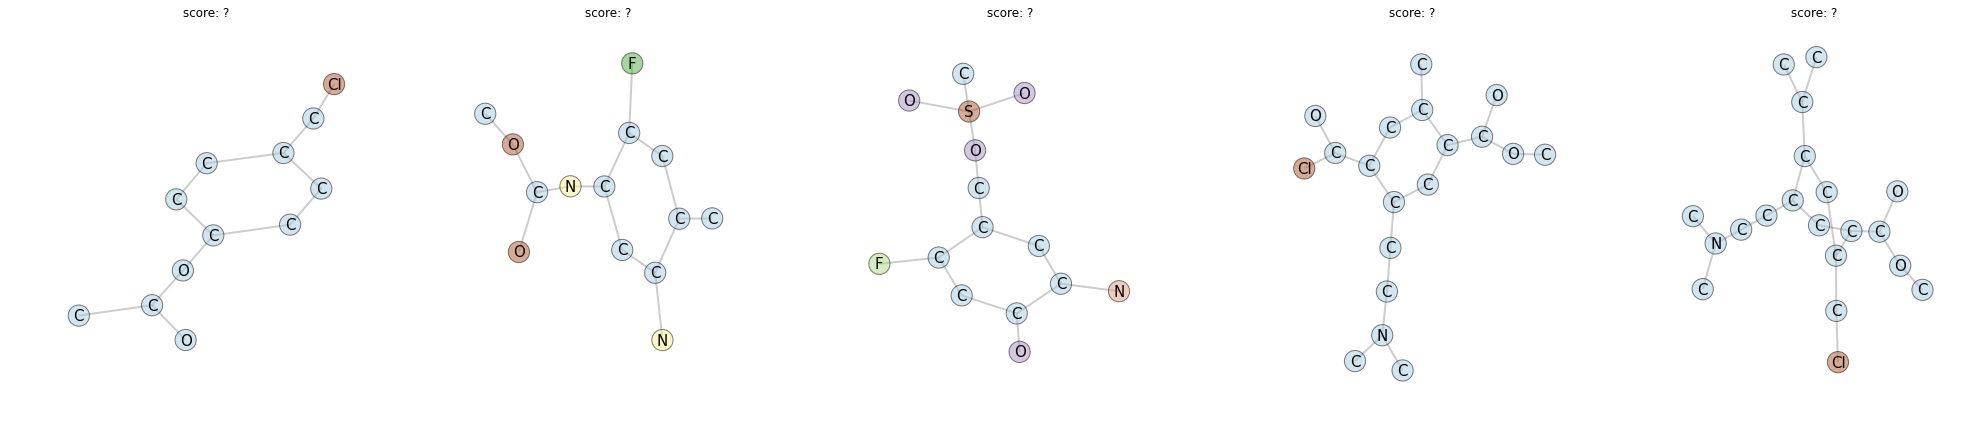

reverse_direction_modifier: 1.043654
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.991590
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 0.850602
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.949458
_propose_graph: iteration 3 ; core 0 of 4 ; original_cips tried  0
reverse_direction_modifier: 1.058076
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.937947
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.124464
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 7 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.068966
_propose_graph: iteration 8 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 1.044737
_propose_graph: iterati

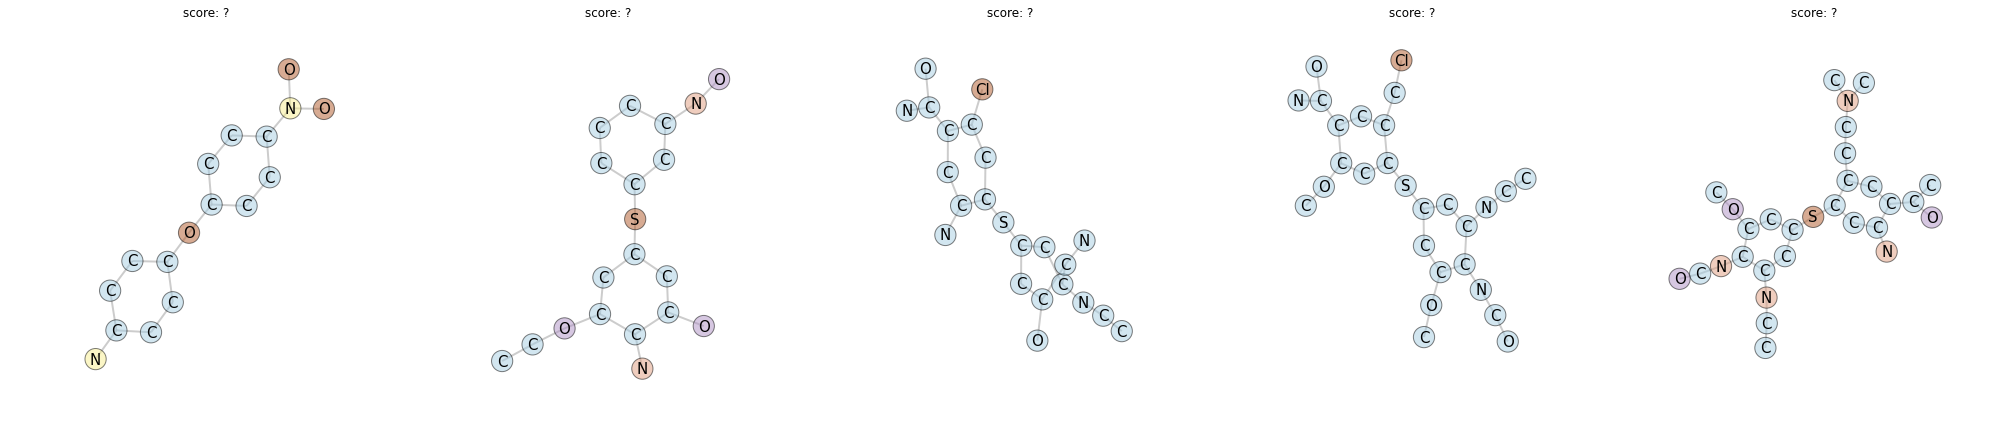

reverse_direction_modifier: 0.956242
_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.957340
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.051282
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.958333
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.078231
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.980488
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 0.973282
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.027451
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.053333
_propose_graph: iteration 9

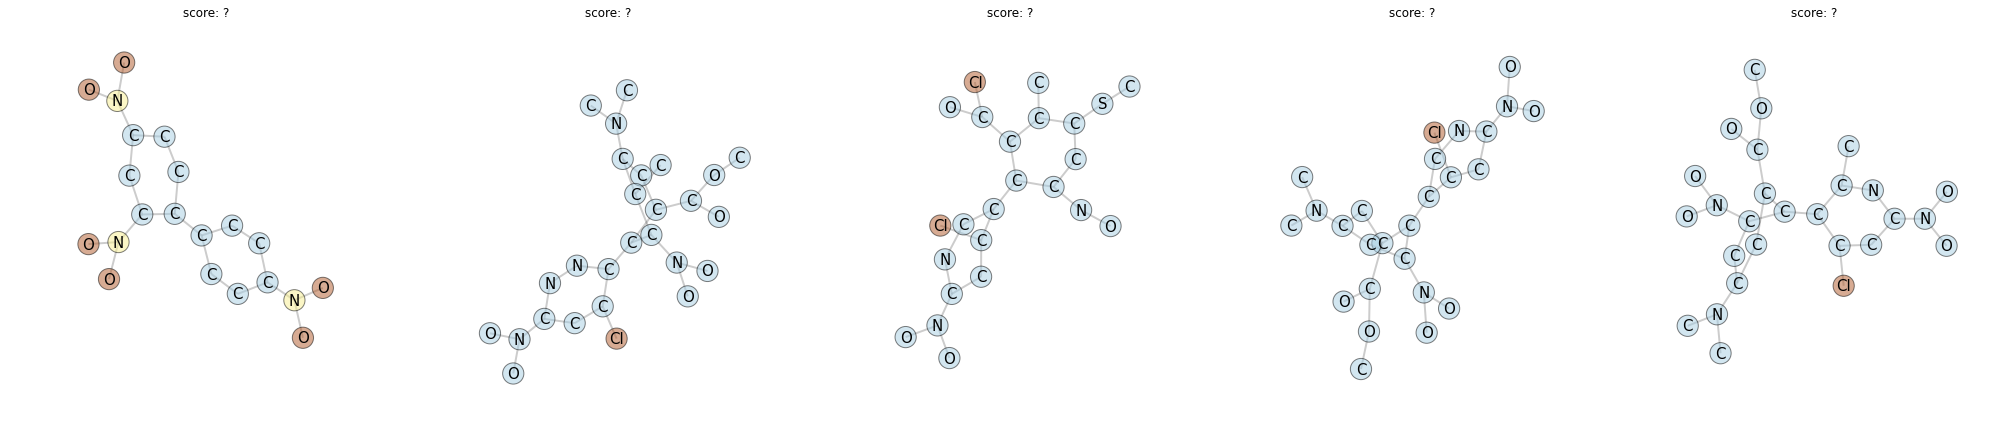

reverse_direction_modifier: 1.023346
_propose_graph: iteration 0 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.928934
_propose_graph: iteration 1 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.981208
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.007782
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.176166
_propose_graph: iteration 4 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.985401
_propose_graph: iteration 5 ; core 0 of 4 ; original_cips tried  0
reverse_direction_modifier: 1.069530
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.074074
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.121019
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 0.949458
_propose_graph: iteratio

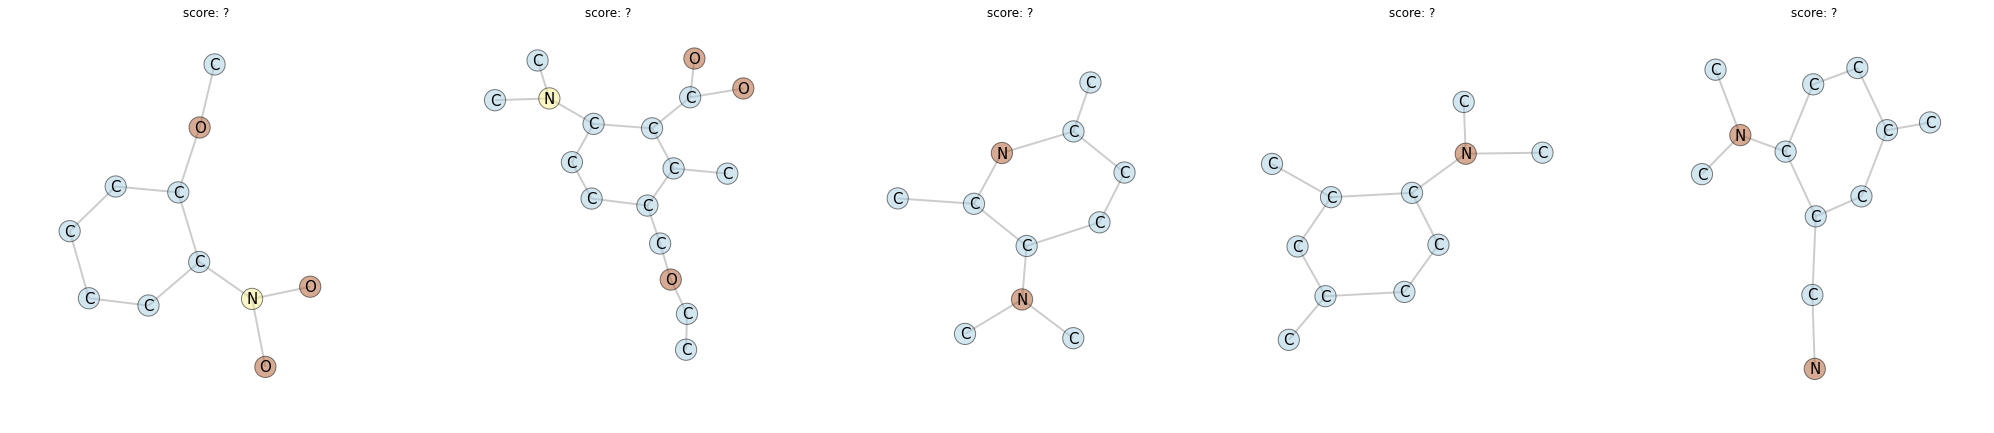

reverse_direction_modifier: 1.053683
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.045056
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.096591
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.098308
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.926667
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.028571
_propose_graph: iteration 5 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.016438
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.014286
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.041629
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.032520
_propose_graph: iteration

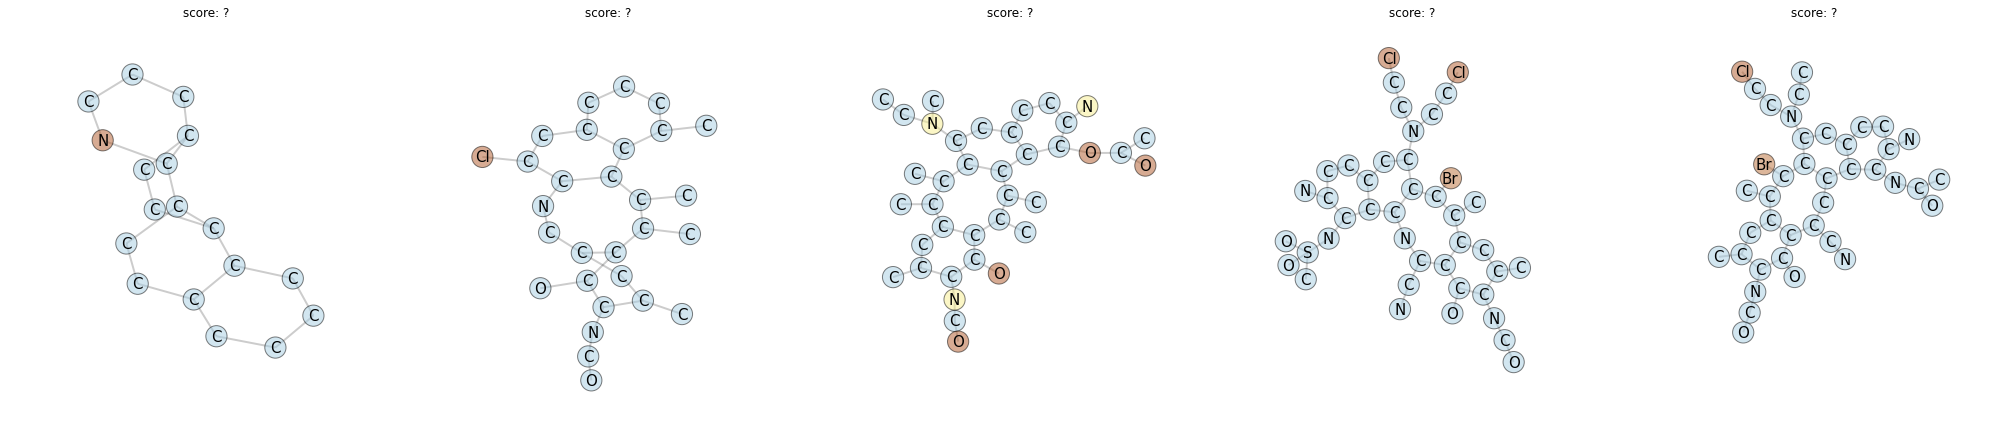

reverse_direction_modifier: 1.040816
_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 0.970055
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.978691
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.047244
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.983368
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.071066
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.033366
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.927273
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.084848
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.984962
_propose_graph: iteration 9

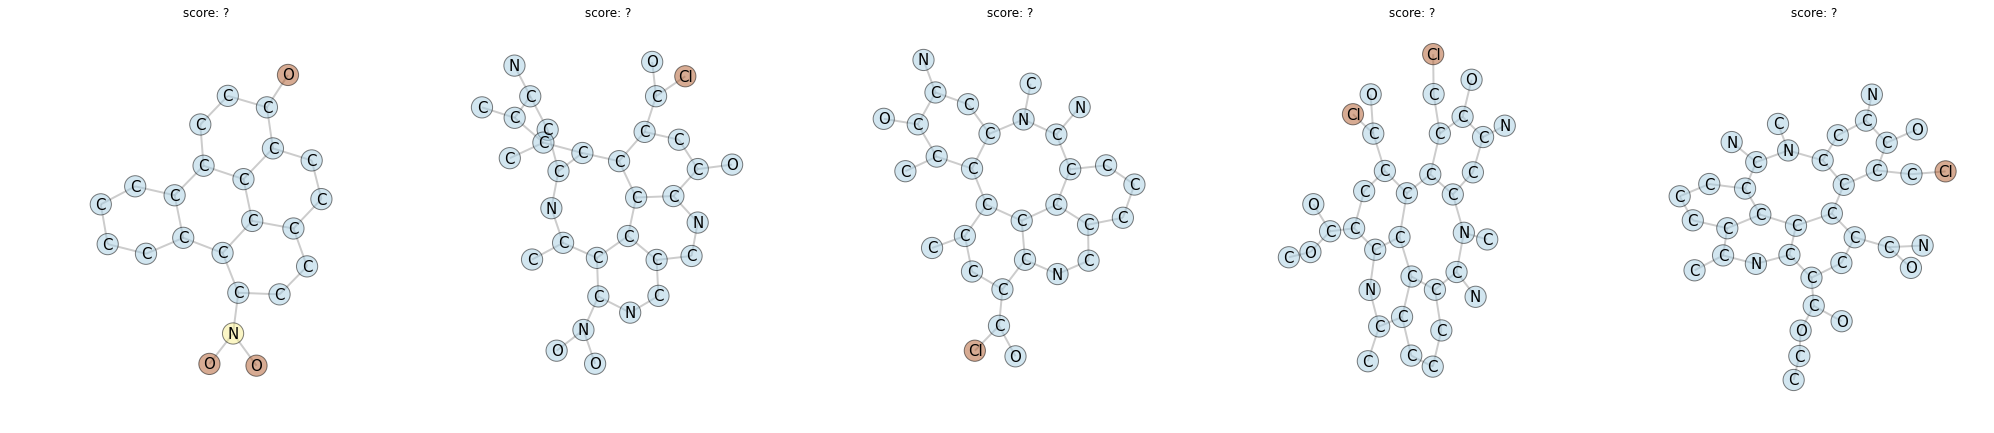

reverse_direction_modifier: 0.994898
_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.985918
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.003199
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.015902
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.032710
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.991017
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.018692
_propose_graph: iteration 6 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.981132
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.982075
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.031973
_propose_graph: iteration 

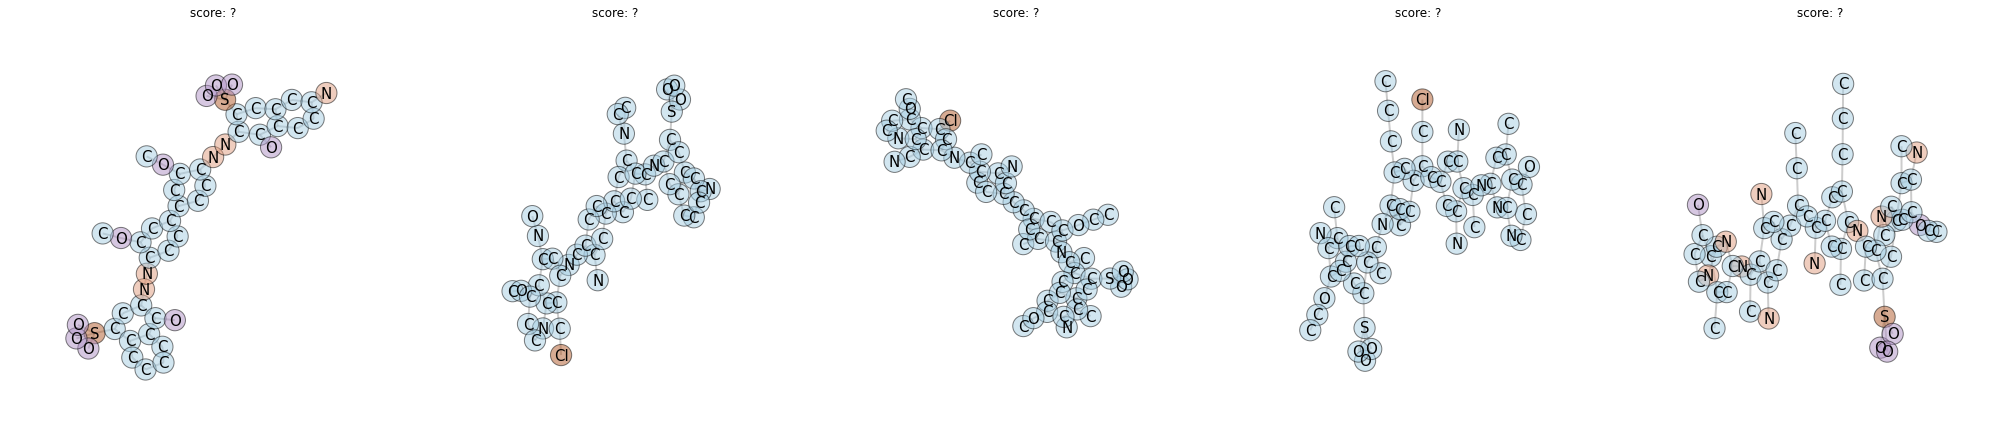

reverse_direction_modifier: 0.811111
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
reverse_direction_modifier: 0.763496
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.921671
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.096257
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.068966
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 0.983333
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.894737
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.924528
_propose_graph: iteration 7 ; core 0 of 3 ; original_cips tried  0
reverse_direction_modifier: 1.032914
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.920000
_propose_graph: iteration

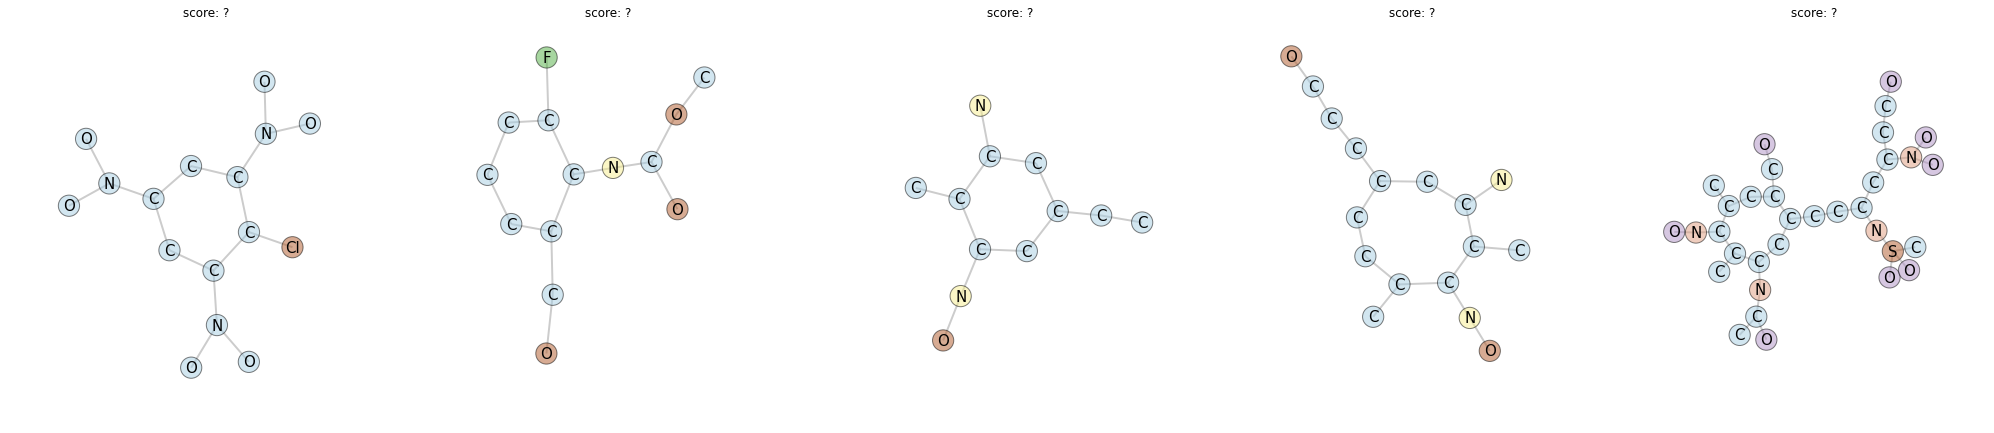

reverse_direction_modifier: 0.938943
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 1.107856
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.044965
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.116175
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
reverse_direction_modifier: 0.952381
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.995624
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 0.977528
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.016807
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.961564
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
reverse_direction_modifier: 1.116838
_propose_graph: iteration 9

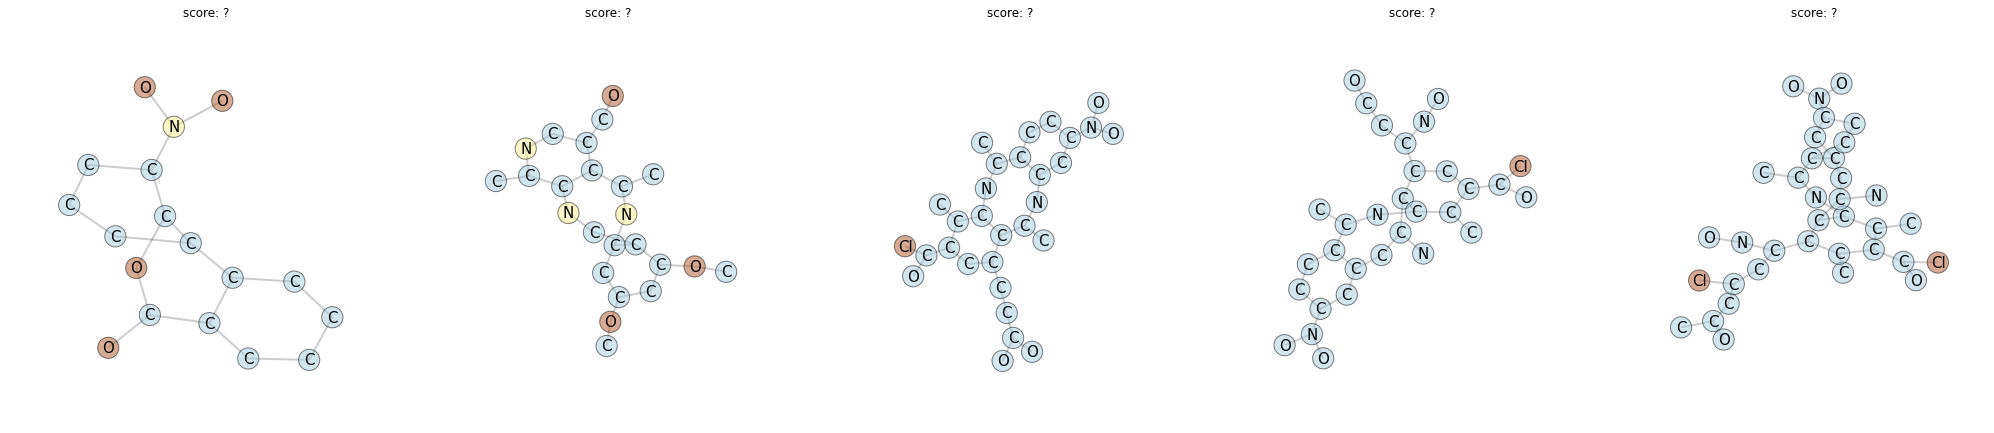

reverse_direction_modifier: 1.047619
_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.045455
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 0.962085
_propose_graph: iteration 2 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0
reverse_direction_modifier: 1.128114
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 0.990244
_propose_graph: iteration 6 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.032184
_propose_graph: iteration 7 ; core 0 of 16 ; original_cips tried  0
reverse_direction_modifier: 1.000000
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
reverse_direction_modifier: 1.029002
_propose_graph: iteratio

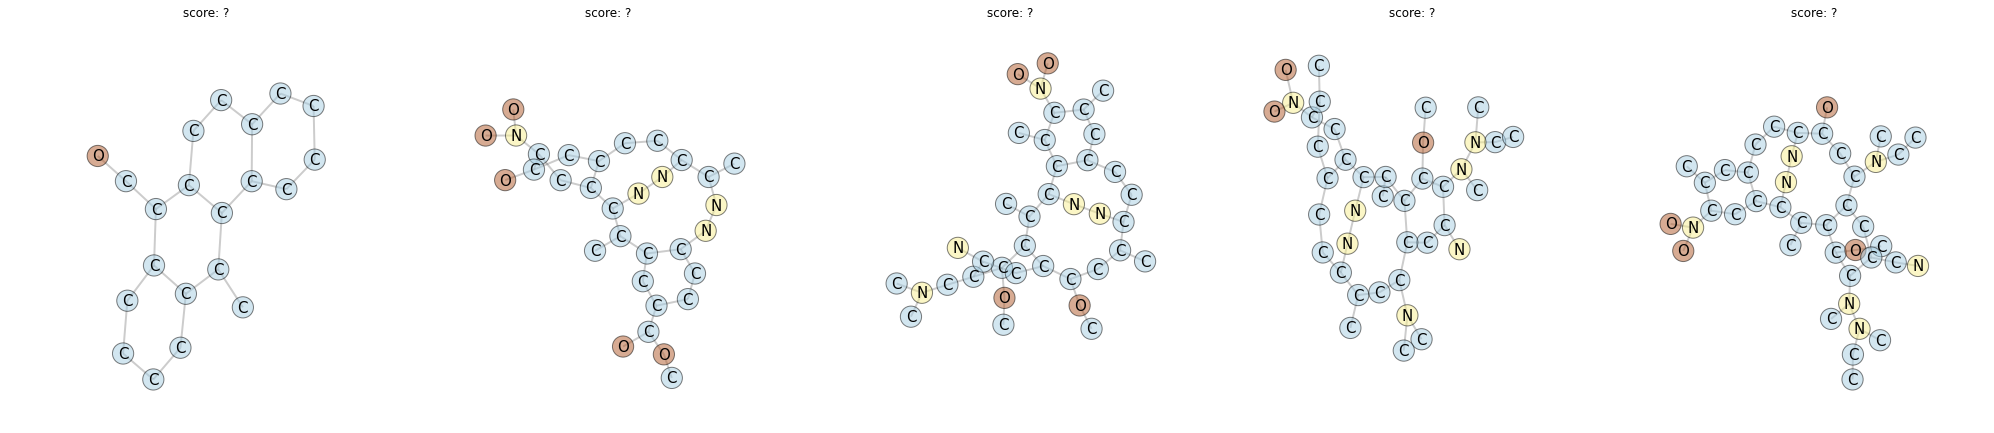

CPU times: user 1min 2s, sys: 1.56 s, total: 1min 4s
Wall time: 1min 6s


In [31]:
%%time
# plot examples of sampling paths
from graphlearn.utils import draw
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    draw.graphlearn(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=draw.get_score_of_graph)

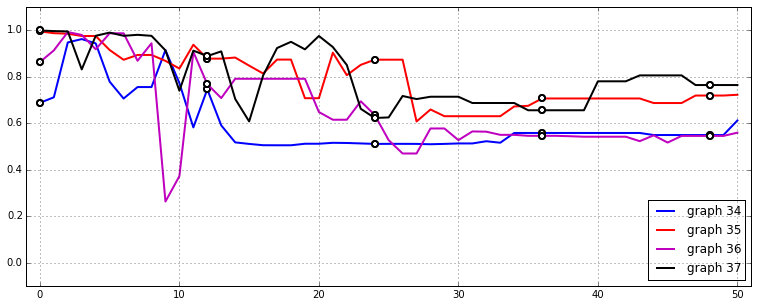

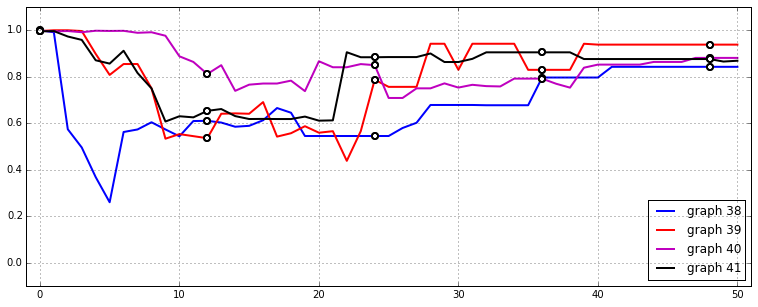

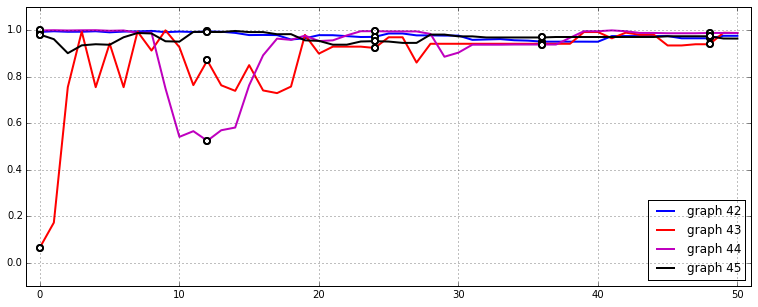

CPU times: user 828 ms, sys: 12 ms, total: 840 ms
Wall time: 836 ms


In [32]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

.